### Getting Started

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
plt.style.use('bmh')
import os

In [9]:
# Read the .csv files
train_data = pd.read_csv('train_malware.csv')
features = pd.read_csv('malware_features.csv', sep=",", encoding='mac_roman')

In [10]:
train_data.head()

id       dur proto service  ... ct_srv_dst  is_sm_ips_ports  attack_cat  label
0   1  0.000011   udp       -  ...          2                0      Normal      0
1   2  0.000008   udp       -  ...          2                0      Normal      0
2   3  0.000005   udp       -  ...          3                0      Normal      0
3   4  0.000006   udp       -  ...          3                0      Normal      0
4   5  0.000010   udp       -  ...          3                0      Normal      0

[5 rows x 45 columns]

In [11]:
features

No.  ...                                        Description
0     1  ...                                  Source IP address
1     2  ...                                 Source port number
2     3  ...                             Destination IP address
3     4  ...                            Destination port number
4     5  ...                               Transaction protocol
5     6  ...  Indicates to the state and its dependent proto...
6     7  ...                              Record total duration
7     8  ...           Source to destination transaction bytes 
8     9  ...            Destination to source transaction bytes
9    10  ...          Source to destination time to live value 
10   11  ...           Destination to source time to live value
11   12  ...           Source packets retransmitted or dropped 
12   13  ...       Destination packets retransmitted or dropped
13   14  ...  http, ftp, smtp, ssh, dns, ftp-data ,irc  and ...
14   15  ...                             Source bits per second
15   16  ...                        Destination bits per second
16   17  ...                Source to destination packet count 
17   18  ...                 Destination to source packet count
18   19  ...              Source TCP window advertisement value
19   20  ...         Destination TCP window advertisement value
20   21  ...                    Source TCP base sequence number
21   22  ...               Destination TCP base sequence number
22   23  ...  Mean of the ?ow packet size transmitted by the...
23   24  ...  Mean of the ?ow packet size transmitted by the...
24   25  ...  Represents the pipelined depth into the connec...
25   26  ...  Actual uncompressed content size of the data t...
26   27  ...                               Source jitter (mSec)
27   28  ...                          Destination jitter (mSec)
28   29  ...                                  record start time
29   30  ...                                   record last time
30   31  ...             Source interpacket arrival time (mSec)
31   32  ...        Destination interpacket arrival time (mSec)
32   33  ...  TCP connection setup round-trip time, the sum ...
33   34  ...  TCP connection setup time, the time between th...
34   35  ...  TCP connection setup time, the time between th...
35   36  ...  If source (1) and destination (3)IP addresses ...
36   37  ...  No. for each state (6) according to specific r...
37   38  ...  No. of flows that has methods such as Get and ...
38   39  ...  If the ftp session is accessed by user and pas...
39   40  ...     No of flows that has a command in ftp session.
40   41  ...  No. of connections that contain the same servi...
41   42  ...  No. of connections that contain the same servi...
42   43  ...  No. of connections of the same destination add...
43   44  ...  No. of connections of the same source address ...
44   45  ...  No of connections of the same source address (...
45   46  ...  No of connections of the same destination addr...
46   47  ...  No of connections of the same source (1) and t...
47   48  ...  The name of each attack category. In this data...
48   49  ...              0 for normal and 1 for attack records

[49 rows x 4 columns]

In [12]:
train_data.shape

(82332, 45)

In [13]:
train_data.describe()

id           dur  ...  is_sm_ips_ports         label
count  82332.000000  82332.000000  ...     82332.000000  82332.000000
mean   41166.500000      1.006756  ...         0.011126      0.550600
std    23767.345519      4.710444  ...         0.104891      0.497436
min        1.000000      0.000000  ...         0.000000      0.000000
25%    20583.750000      0.000008  ...         0.000000      0.000000
50%    41166.500000      0.014138  ...         0.000000      1.000000
75%    61749.250000      0.719360  ...         0.000000      1.000000
max    82332.000000     59.999989  ...         1.000000      1.000000

[8 rows x 41 columns]

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

### Data Cleaning

In [15]:
train_data.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [16]:
train_data.duplicated().sum()

0

In [17]:
# Create a dataframe for numerical variables.
#

objects = ['int64','float64']
numeric = train_data.select_dtypes(include=objects)
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [18]:
# Create a dataframe for numerical variables.
#

objects = ['object']
category = train_data.select_dtypes(include=objects)
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   proto       82332 non-null  object
 1   service     82332 non-null  object
 2   state       82332 non-null  object
 3   attack_cat  82332 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


### Check for Outliers

Outlier in Numeric Columns.
 [[], [1.9242869999999999, 2.773779, 59.995674, 59.995678000000005, 59.995674, 59.995678000000005, 14.846565, 14.846565, 14.846565, 14.355273, 14.355273, 14.355273, 15.53235, 15.590976999999999, 15.53235, 15.53235, 15.590976999999999, 15.590976999999999, 15.979695999999999, 15.226356, 15.979695999999999, 15.226356, 15.979695999999999, 15.226356, 15.374568, 15.374568, 15.374568, 16.448053, 16.76671, 16.76671, 15.40279, 16.448053, 2.462774, 16.76671, 16.448053, 15.40279, 15.40279, 2.417396, 16.044233, 16.352577, 16.044233, 16.352577, 16.352577, 16.044233, 15.102544, 1.9794450000000001, 15.102544, 15.684376, 15.684376, 15.008935999999999, 15.008935999999999, 16.131804000000002, 16.131804000000002, 16.488672, 16.800188000000002, 16.488672, 16.800188000000002, 16.136995000000002, 16.136995000000002, 17.272807999999998, 17.267853, 17.267853, 19.176810999999997, 17.272807999999998, 16.687513, 19.176810999999997, 16.687513, 9.734114, 9.05373, 8.834706, 9.05373, 8.23

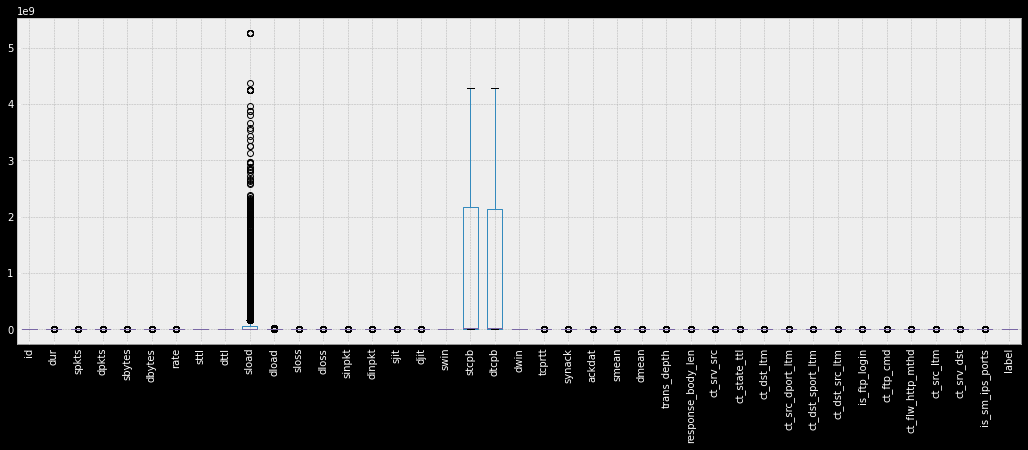

In [19]:
# Checking for outliers in the numeric columns 

plt.figure(figsize=(18,6))

_t, df_outliers = pd.DataFrame.boxplot(numeric, return_type="both", widths=0.6)
plt.xticks(rotation='vertical')
outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]

# pring a list containing our outliers and boxplots for our outliers
print("Outlier in Numeric Columns.\n", out_liers)

In [20]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [21]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numeric:
    rows, columns = numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

id has 0 outliers in total, which is 0.0% of data
dur has 1063 outliers in total, which is 1.3% of data
spkts has 218 outliers in total, which is 0.26% of data
dpkts has 701 outliers in total, which is 0.85% of data
sbytes has 102 outliers in total, which is 0.12% of data
dbytes has 649 outliers in total, which is 0.79% of data
rate has 1036 outliers in total, which is 1.3% of data
sttl has 0 outliers in total, which is 0.0% of data
dttl has 0 outliers in total, which is 0.0% of data
sload has 1372 outliers in total, which is 1.7% of data
dload has 2737 outliers in total, which is 3.3% of data
sloss has 127 outliers in total, which is 0.15% of data
dloss has 653 outliers in total, which is 0.79% of data
sinpkt has 912 outliers in total, which is 1.1% of data
dinpkt has 437 outliers in total, which is 0.53% of data
sjit has 579 outliers in total, which is 0.7% of data
djit has 610 outliers in total, which is 0.74% of data
swin has 0 outliers in total, which is 0.0% of data
stcpb has 0 o

>>
The data contains some outliers.
>>
Most of the outliers are below 5% of the data, which means, if removed they won't cause significant change in the ioverall model performance. 

In [22]:

# Getting ouliers from our dataframe using a z-test
#
from scipy import stats
z = np.abs(stats.zscore(numeric))
print(f" z-score list: {z}\n")

df_o = numeric[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

 z-score list: [[1.73202977 0.21372745 0.1244551  ... 0.64419018 0.10607007 1.10688264]
 [1.7319877  0.21372808 0.1244551  ... 0.64419018 0.10607007 1.10688264]
 [1.73194562 0.21372872 0.1244551  ... 0.554273   0.10607007 1.10688264]
 ...
 [1.73194562 0.21372978 0.1319225  ... 0.73410735 9.42773017 1.10688264]
 [1.7319877  0.21372978 0.1319225  ... 0.73410735 9.42773017 1.10688264]
 [1.73202977 0.21372787 0.1244551  ... 0.73410735 0.10607007 1.10688264]]

Previous dataframe size : 82332
New dataframe size: 61667


### Explorative Data Analysis

#### Frequency plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


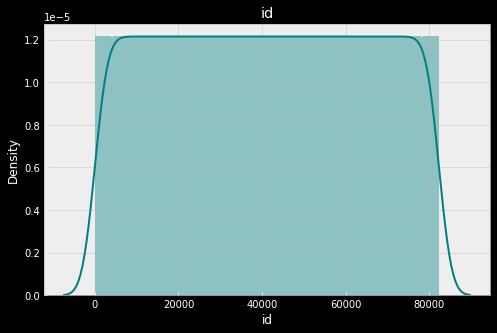

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


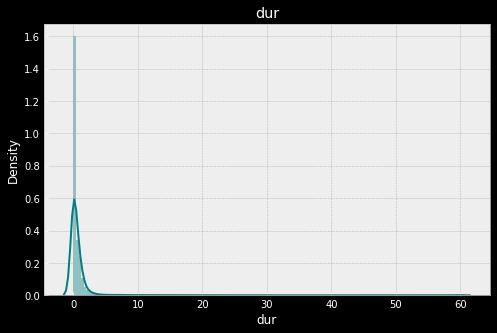

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


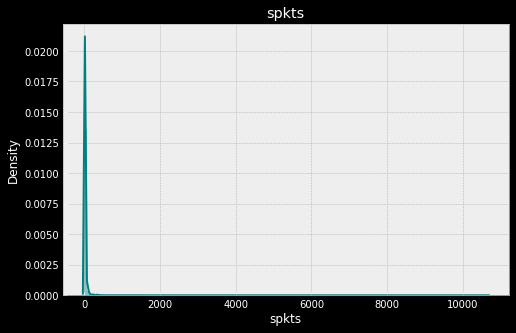

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


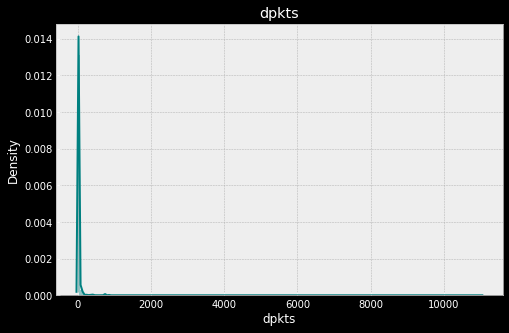

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


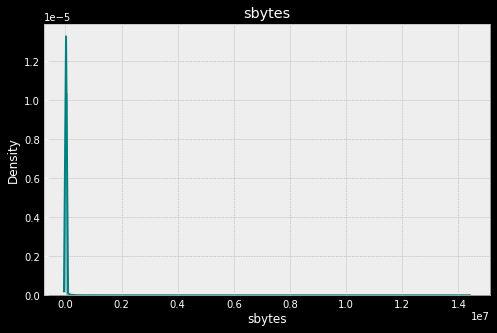

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


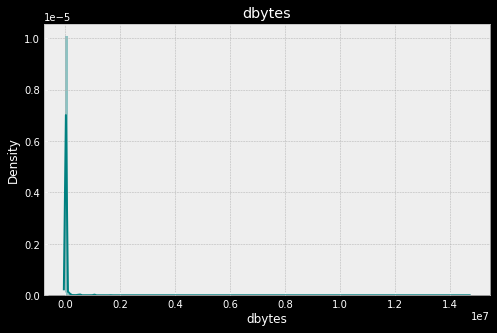

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


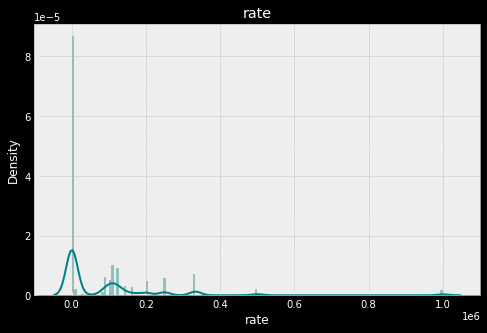

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


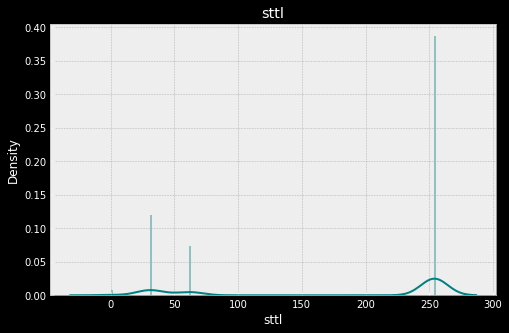

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


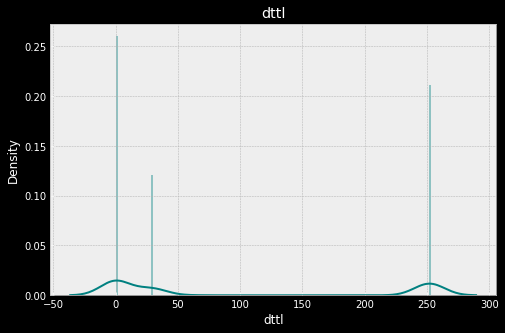

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


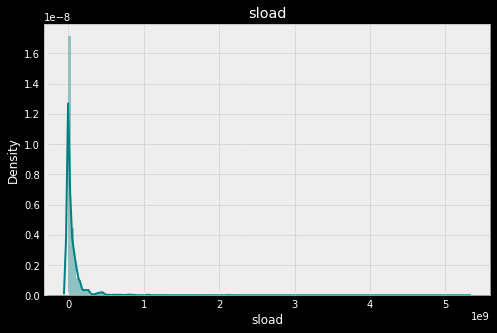

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


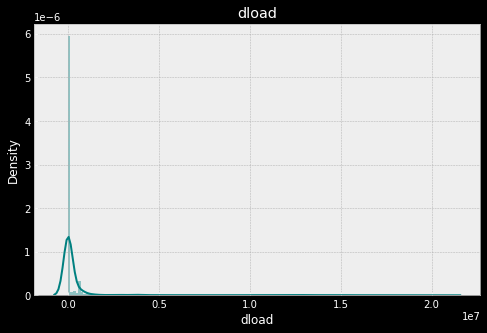

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


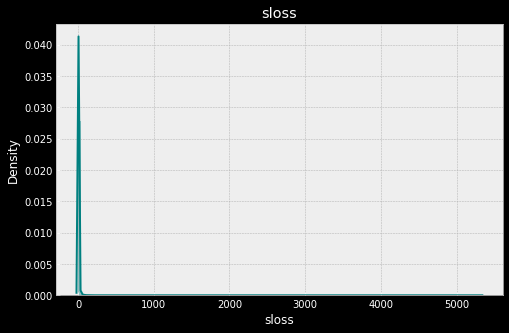

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


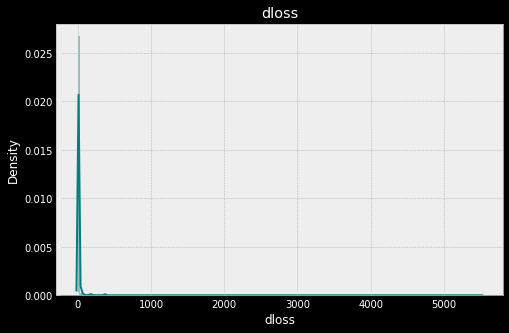

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


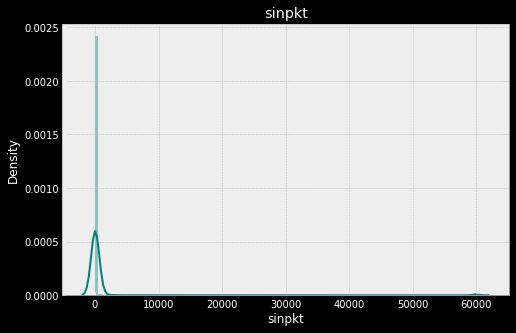

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


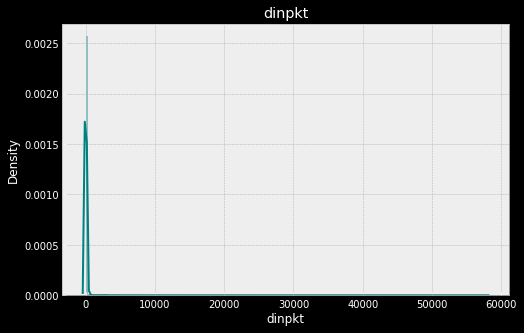

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


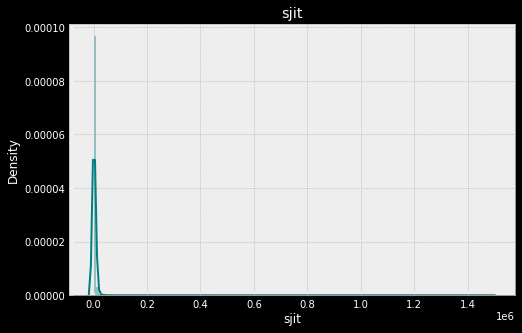

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


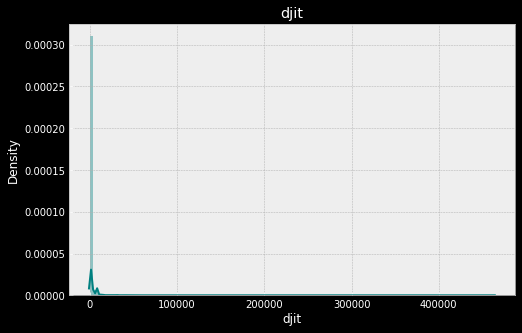

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


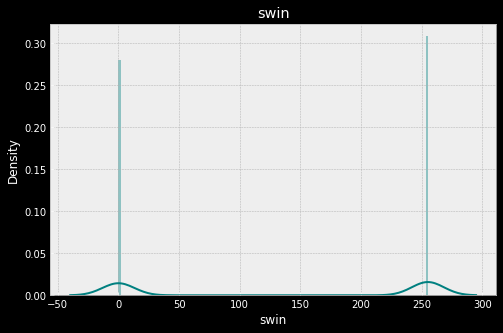

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


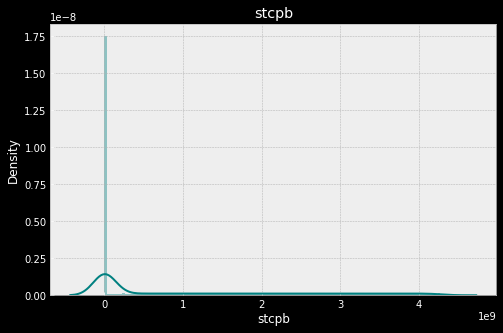

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


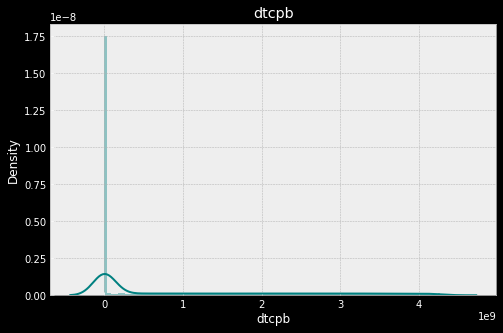

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


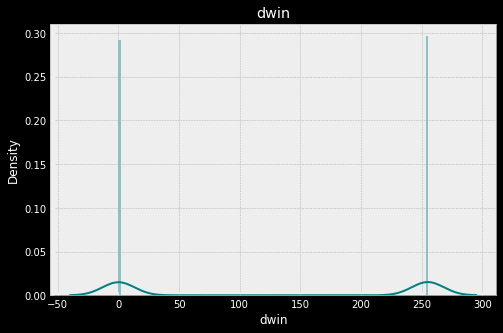

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


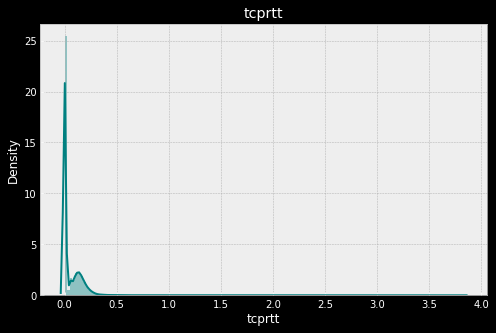

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


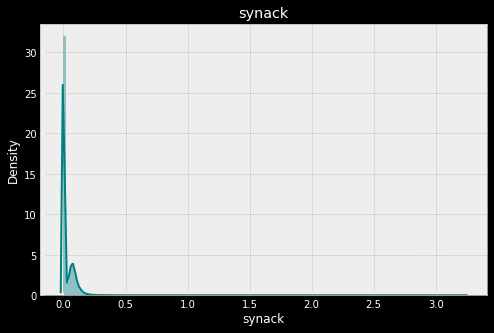

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


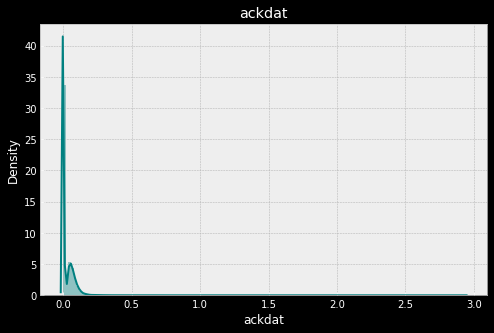

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


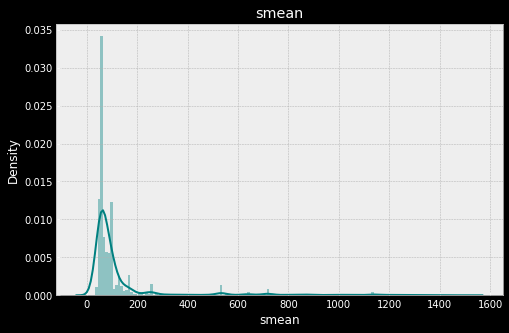

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


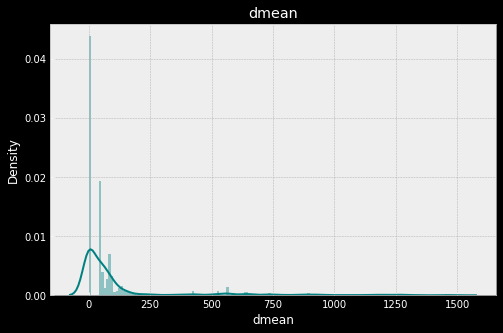

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


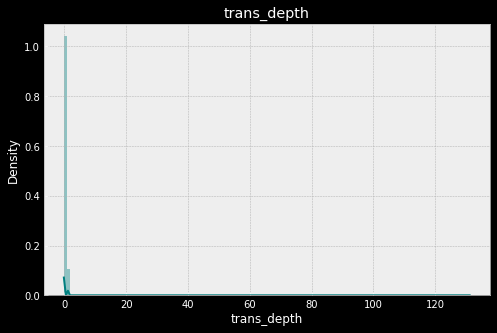

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


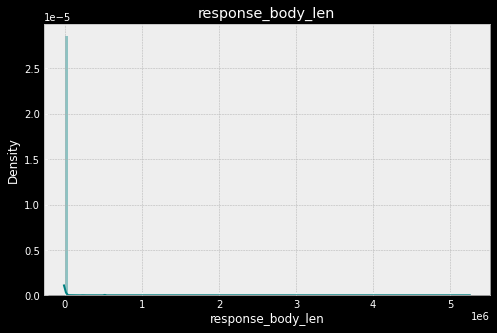

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


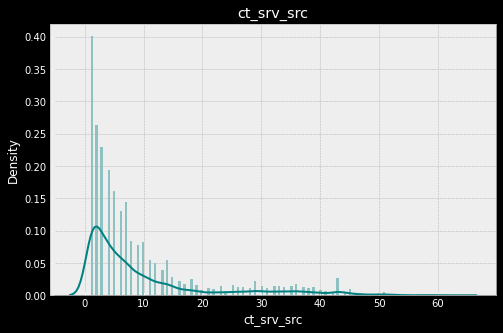

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


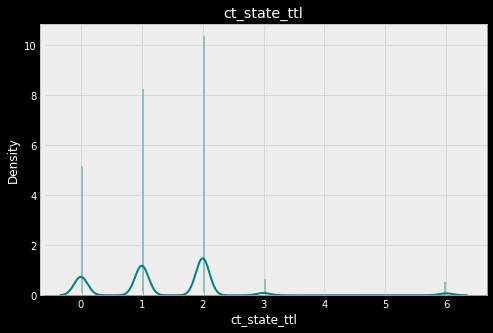

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


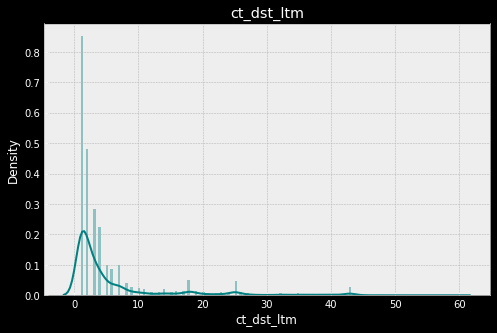

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


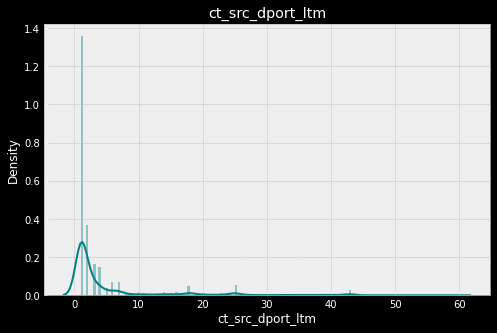

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


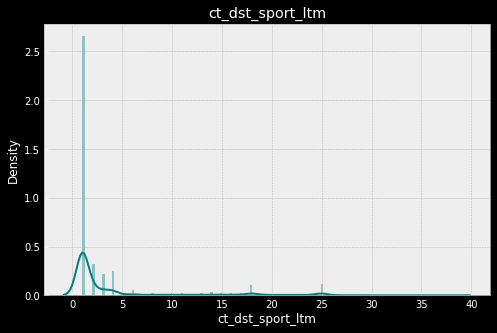

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


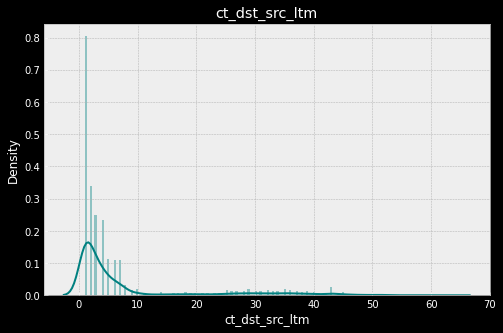

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


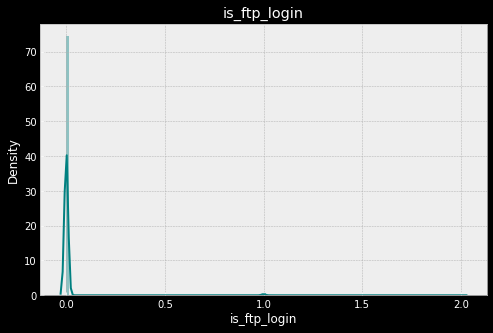

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


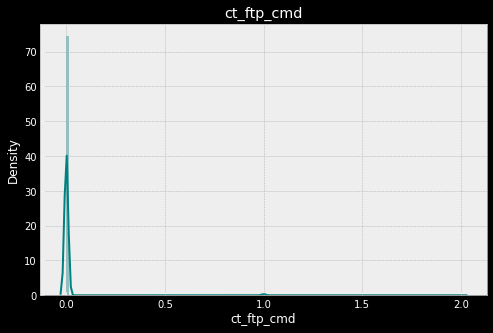

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


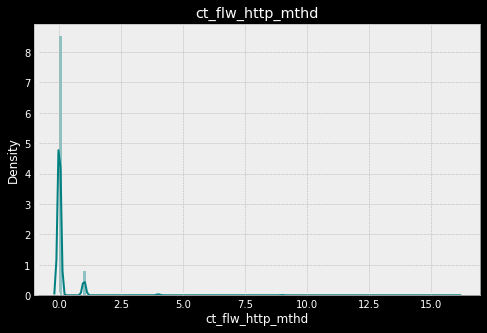

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


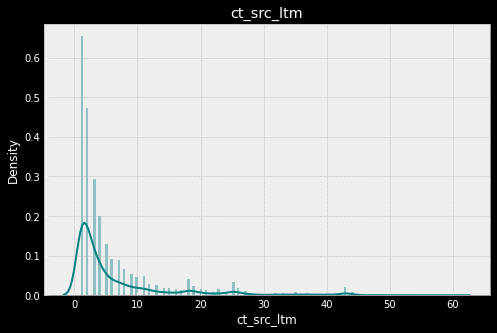

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


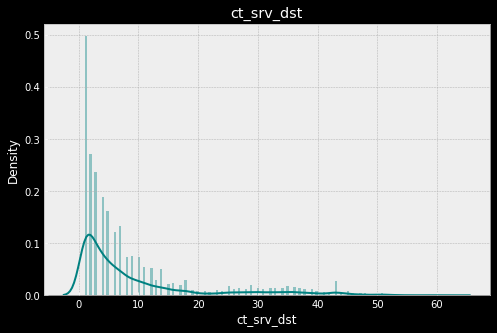

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


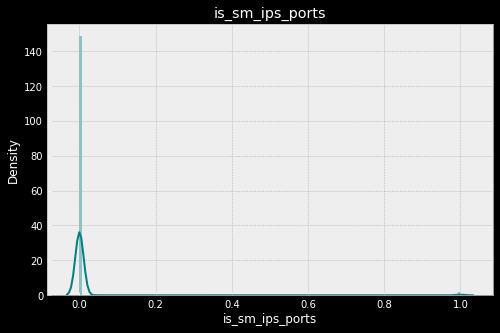

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


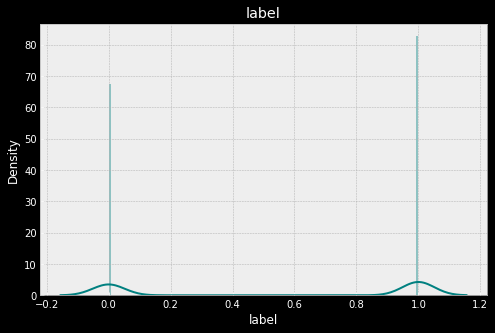

In [23]:
# Ploting the bivariate summaries and recording our observations
# Plot histogram of frequency for the columns
for i, j in enumerate(numeric):
  plt.figure(figsize=(8, 5))
  plt.title(j)
  sns.set_color_codes("pastel")
  sns.distplot(train_data[j], color='teal',norm_hist=True,kde=True,bins=150)
  plt.show()

In [24]:
train_data.head(3)

id       dur proto service  ... ct_srv_dst  is_sm_ips_ports  attack_cat  label
0   1  0.000011   udp       -  ...          2                0      Normal      0
1   2  0.000008   udp       -  ...          2                0      Normal      0
2   3  0.000005   udp       -  ...          3                0      Normal      0

[3 rows x 45 columns]

In [25]:
df = pd.concat([numeric, category],axis=1)
df.head(3)

id       dur  spkts  dpkts  sbytes  ...  label  proto  service  state  attack_cat
0   1  0.000011      2      0     496  ...      0    udp        -    INT      Normal
1   2  0.000008      2      0    1762  ...      0    udp        -    INT      Normal
2   3  0.000005      2      0    1068  ...      0    udp        -    INT      Normal

[3 rows x 45 columns]

In [26]:
df.isna().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
proto                0
service              0
state      

In [27]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
label                0
proto                0
service              0
state      

#### Boxplots

##### **dur**
>Record total duration

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

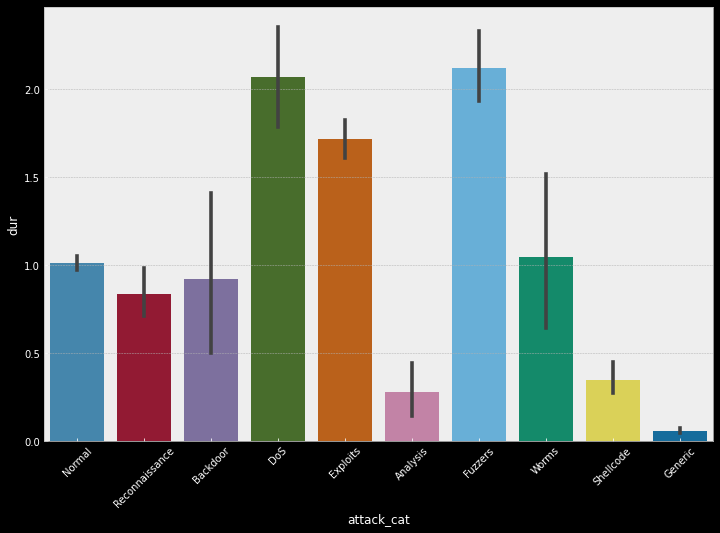

In [28]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dur'], ax=ax)
plt.xticks(rotation="45")

##### **spkts**
>Source to destination packet count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

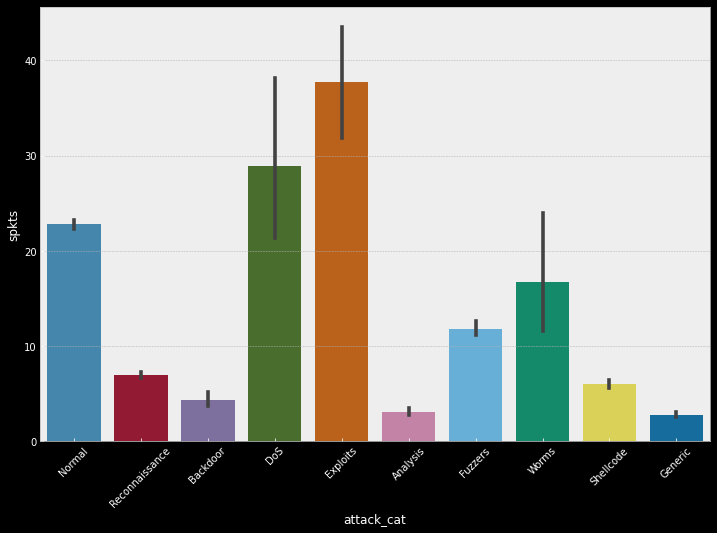

In [29]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['spkts'], ax=ax)
plt.xticks(rotation="45")

##### **dpkts** 
>Destination to source packet count

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

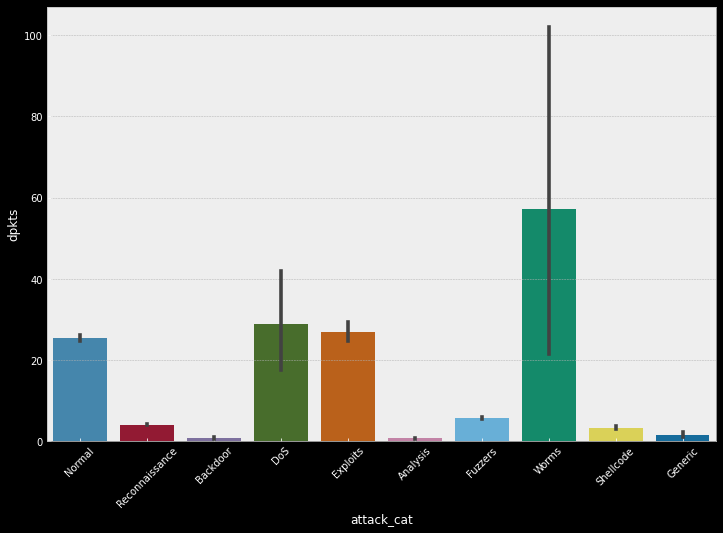

In [30]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dpkts'], ax=ax)
plt.xticks(rotation="45")

##### **sttl**
>Source to destination time to live value

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

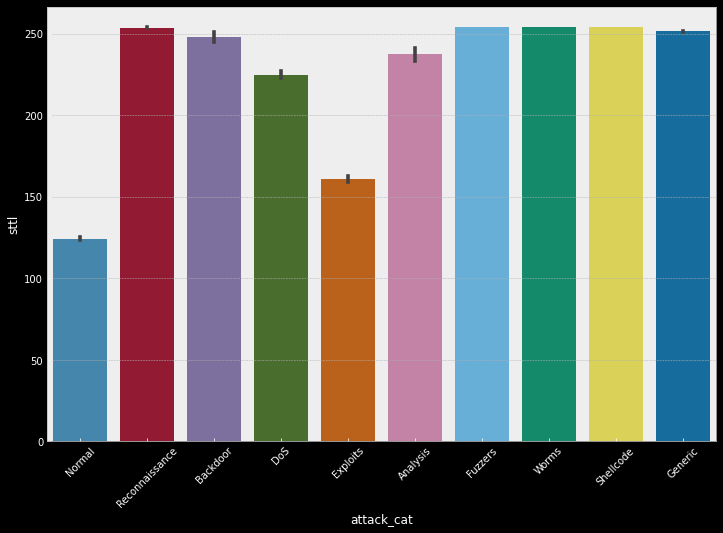

In [31]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['sttl'], ax=ax)
plt.xticks(rotation="45")

>>
We notice an interesting trend in the "Source to destination time to live value".
>>
It appears that the sttl time for all malwares is higher than the normal, which has the lowest sttl value.

##### **dttl**
>Destination to source time to live value

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

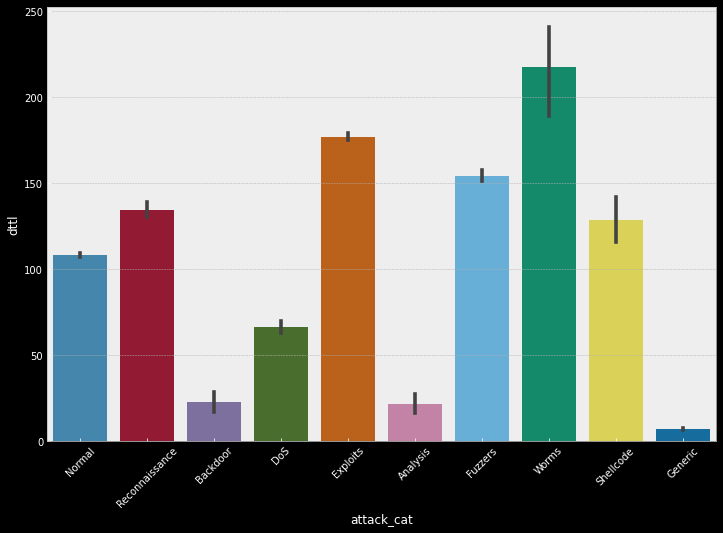

In [32]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dttl'], ax=ax)
plt.xticks(rotation="45")

##### **sloss**
>Source packets retransmitted or dropped

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

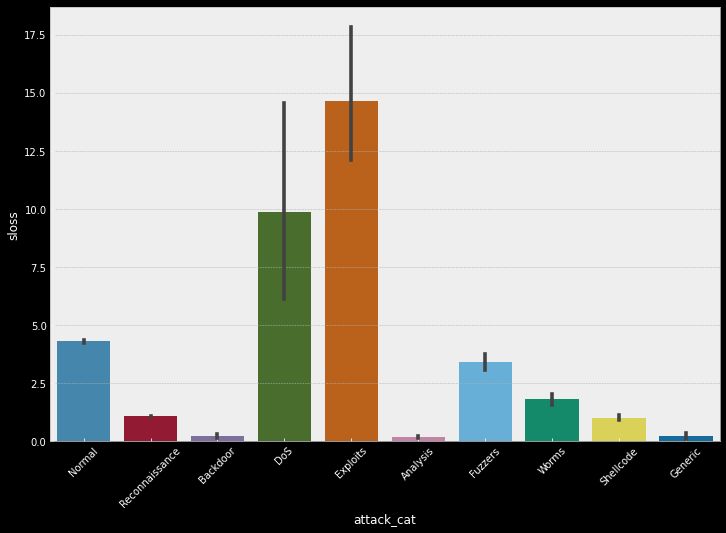

In [33]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['sloss'], ax=ax)
plt.xticks(rotation="45")

##### **dloss**
>Destination packets retransmitted or dropped

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

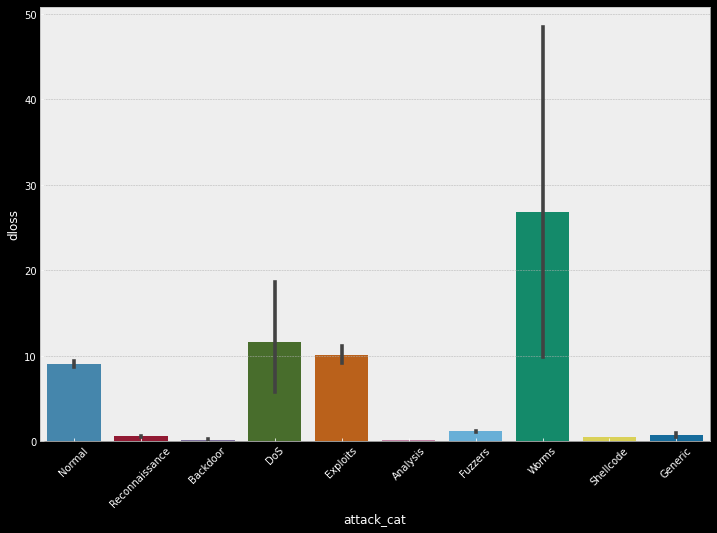

In [34]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dloss'], ax=ax)
plt.xticks(rotation="45")

##### **service**
>http, ftp, smtp, ssh, dns, ftp-data ,irc etc.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

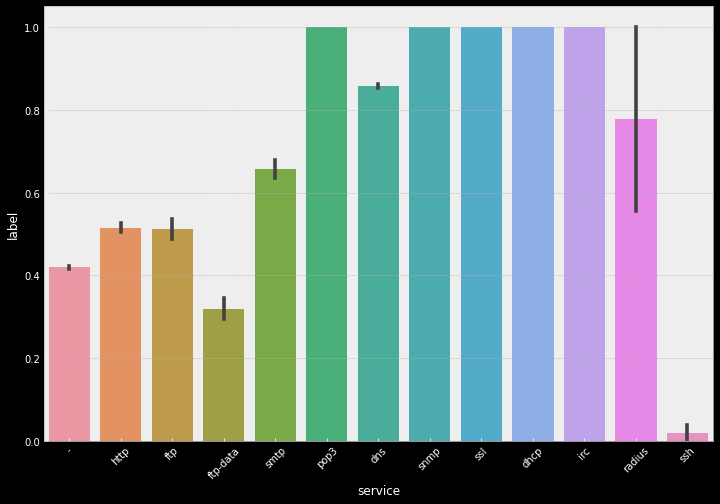

In [35]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['service'], y = df['label'], ax=ax)
plt.xticks(rotation="45")

##### **sload**
>Source bits per second

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

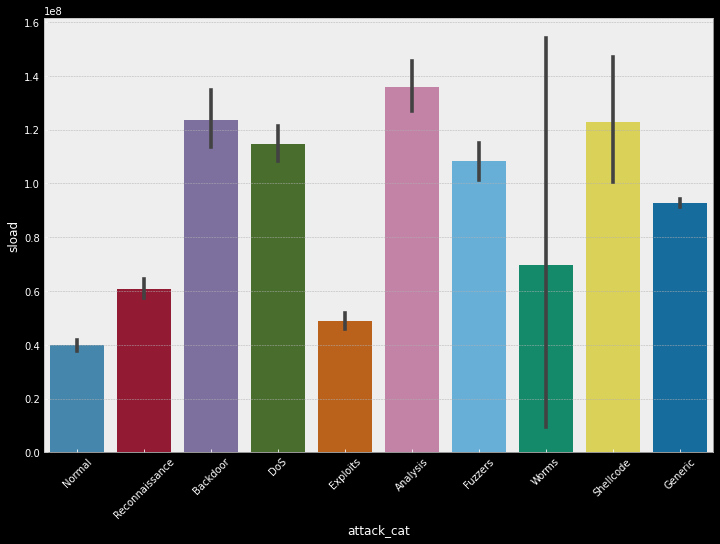

In [37]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['sload'], ax=ax)
plt.xticks(rotation="45")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

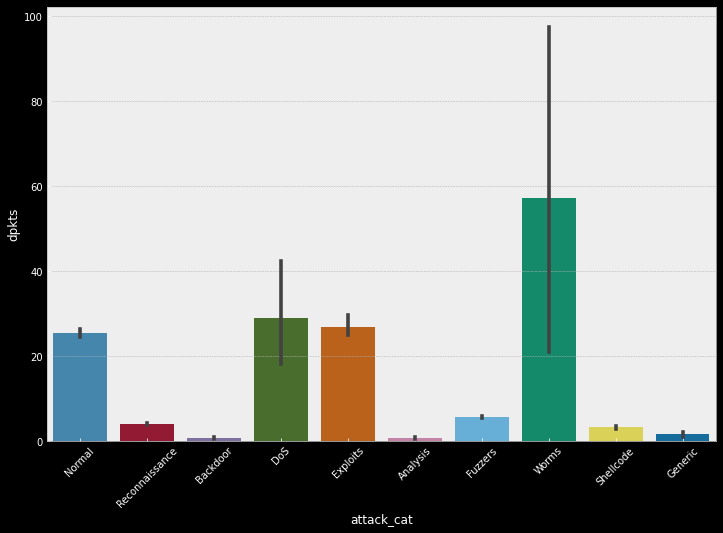

In [39]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dpkts'], ax=ax)
plt.xticks(rotation="45")

##### **swin**
>Source TCP window advertisement value

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

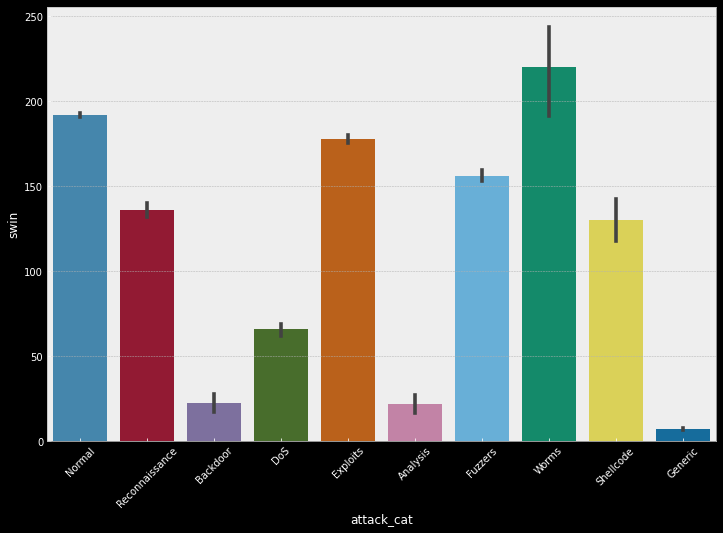

In [40]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['swin'], ax=ax)
plt.xticks(rotation="45")

##### **dwin**
>Destination TCP window advertisement value

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

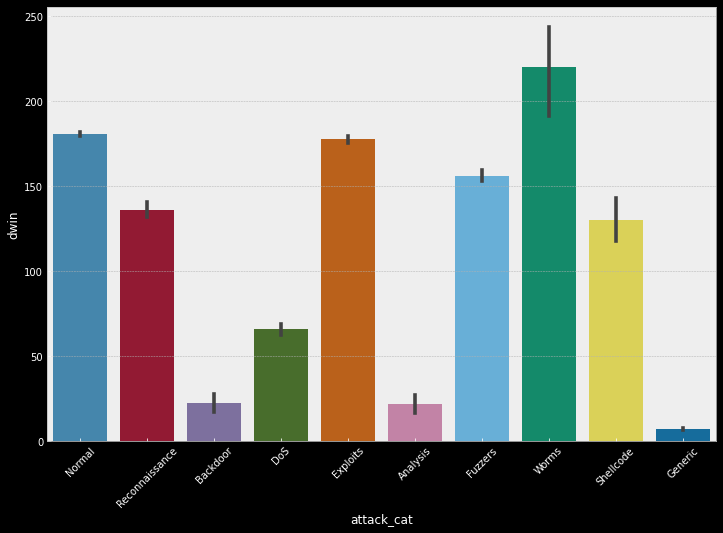

In [41]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dwin'], ax=ax)
plt.xticks(rotation="45")

##### **stcpb**
>Source TCP base sequence number

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

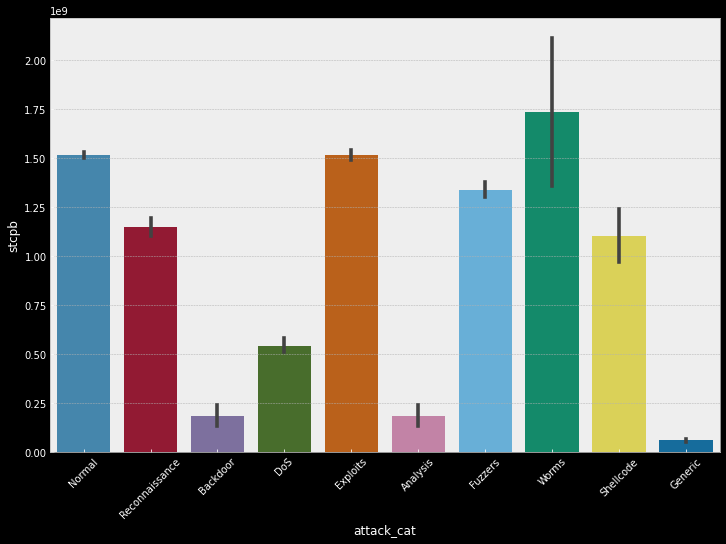

In [44]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['stcpb'], ax=ax)
plt.xticks(rotation="45")

##### **dtcpb**
>Destination TCP base sequence number

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

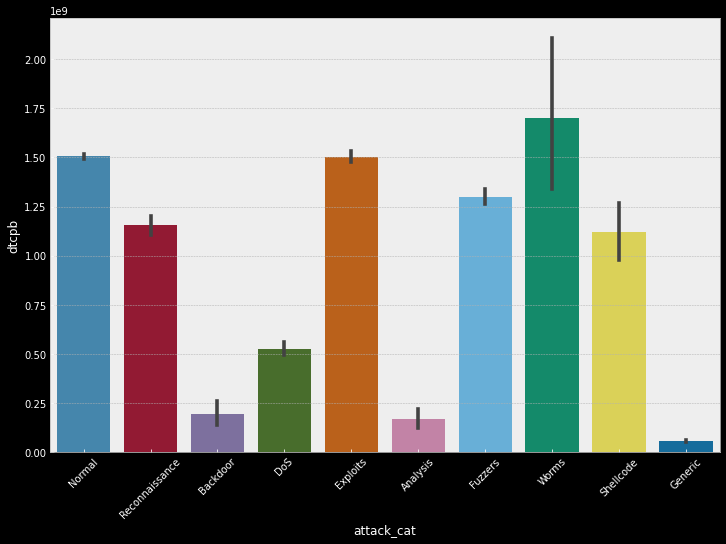

In [45]:
# Ploting the univariate summaries and recording our observations
#
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = df['attack_cat'], y = df['dtcpb'], ax=ax)
plt.xticks(rotation="45")

In [43]:
features.iloc[19:30,]

No.  ...                                        Description
19   20  ...         Destination TCP window advertisement value
20   21  ...                    Source TCP base sequence number
21   22  ...               Destination TCP base sequence number
22   23  ...  Mean of the ?ow packet size transmitted by the...
23   24  ...  Mean of the ?ow packet size transmitted by the...
24   25  ...  Represents the pipelined depth into the connec...
25   26  ...  Actual uncompressed content size of the data t...
26   27  ...                               Source jitter (mSec)
27   28  ...                          Destination jitter (mSec)
28   29  ...                                  record start time
29   30  ...                                   record last time

[11 rows x 4 columns]

### Features Correlation

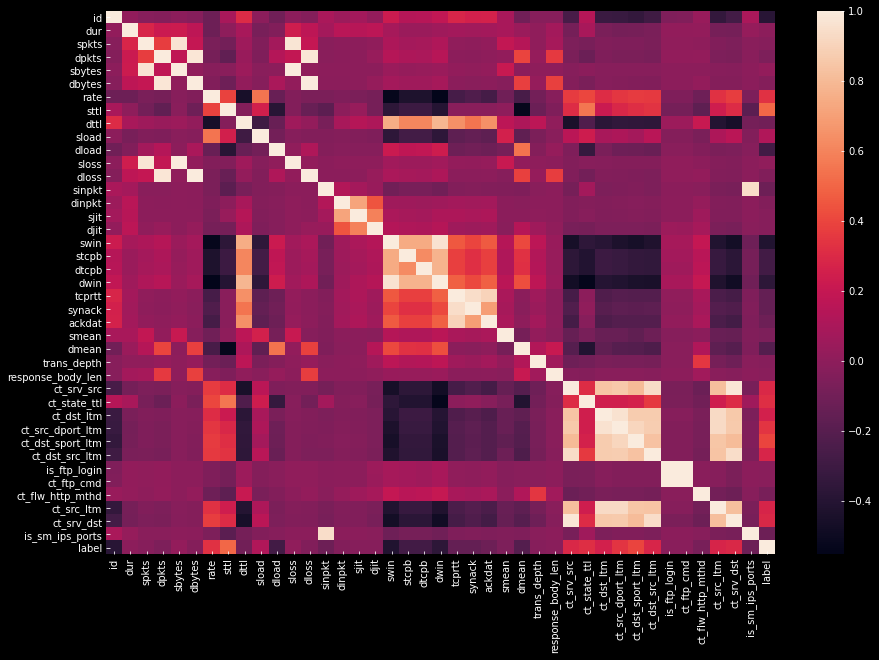

In [48]:
# Correlation matrix
#
f, ax = plt.subplots(figsize=(15,10))
corr = numeric.corr()
sns.heatmap(corr,\
            xticklabels = corr.columns.values,\
            yticklabels = corr.columns.values)

In [50]:
# Check for the correlation of the features
#
numeric.corr()

id       dur  ...  is_sm_ips_ports     label
id                 1.000000  0.016037  ...         0.097736 -0.387489
dur                0.016037  1.000000  ...         0.027472 -0.001145
spkts             -0.020766  0.280239  ...        -0.013960 -0.027731
dpkts             -0.037020  0.217507  ...        -0.016103 -0.061515
sbytes            -0.005647  0.225432  ...        -0.004910  0.020641
dbytes            -0.031115  0.172492  ...        -0.009267 -0.032632
rate              -0.121700 -0.118031  ...        -0.058689  0.328629
sttl               0.095939 -0.000986  ...        -0.187933  0.504159
dttl               0.306539  0.090048  ...        -0.087019 -0.098591
sload             -0.003063 -0.076343  ...        -0.038030  0.124548
dload             -0.106562 -0.047032  ...        -0.027949 -0.280534
sloss             -0.006852  0.240113  ...        -0.007792  0.006360
dloss             -0.033966  0.171182  ...        -0.012012 -0.044399
sinpkt             0.100814  0.079840  ...         0.944506 -0.120768
dinpkt             0.048488  0.150801  ...        -0.009989 -0.037585
sjit               0.072775  0.146599  ...        -0.011891 -0.027397
djit               0.021298  0.165418  ...        -0.015615 -0.027131
swin               0.228434  0.083990  ...        -0.110225 -0.414504
stcpb              0.143912  0.044482  ...        -0.082184 -0.281428
dtcpb              0.145089  0.045306  ...        -0.082390 -0.282860
dwin               0.185379  0.061186  ...        -0.106732 -0.369257
tcprtt             0.283052  0.075329  ...        -0.051128 -0.148800
synack             0.259464  0.066530  ...        -0.043797 -0.149944
ackdat             0.262394  0.073074  ...        -0.051346 -0.120522
smean              0.092661  0.090527  ...        -0.047594 -0.061146
dmean             -0.102775  0.043637  ...        -0.050423 -0.211544
trans_depth       -0.023927  0.006017  ...        -0.018419 -0.025804
response_body_len -0.022225  0.076215  ...        -0.004445 -0.016414
ct_srv_src        -0.261561 -0.088328  ...        -0.079643  0.290195
ct_state_ttl       0.138739  0.093925  ...         0.064426  0.318517
ct_dst_ltm        -0.314142 -0.072591  ...        -0.056995  0.257995
ct_src_dport_ltm  -0.317444 -0.086880  ...        -0.046900  0.341513
ct_dst_sport_ltm  -0.346396 -0.081637  ...        -0.043777  0.393668
ct_dst_src_ltm    -0.297913 -0.071127  ...        -0.057964  0.279989
is_ftp_login      -0.049584  0.015724  ...        -0.009637 -0.016206
ct_ftp_cmd        -0.049279  0.015547  ...        -0.009612 -0.017138
ct_flw_http_mthd   0.035399  0.018879  ...        -0.021547 -0.075028
ct_src_ltm        -0.345738 -0.080789  ...        -0.065164  0.276494
ct_srv_dst        -0.275818 -0.091253  ...        -0.075712  0.292931
is_sm_ips_ports    0.097736  0.027472  ...         1.000000 -0.117407
label             -0.387489 -0.001145  ...        -0.117407  1.000000

[41 rows x 41 columns]

### Implementing the Solution

In [53]:
for col in category:
  df[col] = pd.get_dummies(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   spkts              82332 non-null  int64  
 3   dpkts              82332 non-null  int64  
 4   sbytes             82332 non-null  int64  
 5   dbytes             82332 non-null  int64  
 6   rate               82332 non-null  float64
 7   sttl               82332 non-null  int64  
 8   dttl               82332 non-null  int64  
 9   sload              82332 non-null  float64
 10  dload              82332 non-null  float64
 11  sloss              82332 non-null  int64  
 12  dloss              82332 non-null  int64  
 13  sinpkt             82332 non-null  float64
 14  dinpkt             82332 non-null  float64
 15  sjit               82332 non-null  float64
 16  djit               823

In [54]:
df.head(3)

id       dur  spkts  dpkts  sbytes  ...  label  proto  service  state  attack_cat
0   1  0.000011      2      0     496  ...      0      0        1      0           0
1   2  0.000008      2      0    1762  ...      0      0        1      0           0
2   3  0.000005      2      0    1068  ...      0      0        1      0           0

[3 rows x 45 columns]

In [56]:
# Split data into features and labels
#
X = df.drop(["label"],axis=1).values
y = df['label'].values

### Implementing the Solution

#### Linear and Lasso Regression

In [62]:
#Split to train and test and compare lasso and linear. 
# USe grid search to get the best value of alpha for lasso
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import warnings
# Fit data to lasso model before splitting
#
from sklearn.linear_model import Lasso

linreg = LinearRegression()
lasso = Lasso(alpha=0.5)


x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

parameters = {'alpha':np.concatenate((np.arange(0.1,2,0.1), np.arange(2,5,0.5), np.arange(5, 25, 1)))}

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')

# Lasso
gridlasso.fit(x_train, y_train)
print('------------------- LASSO REGRESSION --------------------')
print(f"Lasso parameter: {gridlasso.best_params_}")
print(f"Lasso score: {gridlasso.score(x_test, y_test)}")
print(f"lasso MSE: {np.sqrt(mean_squared_error(y_test, gridlasso.predict(x_test)))}\n")

# Linear regression
linreg.fit(x_train, y_train)
print('------------------- LINEAR REGRESSION --------------------')
print(f"Linear score: {linreg.score(x_test, y_test)}")
print(f"Linear RMSE: {np.sqrt(mean_squared_error(y_test, linreg.predict(x_test)))}")
print(f"Linear coefficients: {linreg.coef_}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2921.356430544333, tolerance: 1.3041029890685354
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2932.030819533121, tolerance: 1.3039826064677746
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2917.383711720332, tolerance: 1.304842997039387
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2921.56755

------------------- LASSO REGRESSION --------------------
Lasso parameter: {'alpha': 0.1}
Lasso score: 0.5774443318602456
lasso MSE: 0.3231019176105103

------------------- LINEAR REGRESSION --------------------
Linear score: 0.6861703561321425
Linear RMSE: 0.2784482877925713
Linear coefficients: [-9.46575562e-06 -6.56359010e-05 -8.15035013e-04 -1.86859925e-03
 -2.23432167e-07 -3.71488340e-06  1.44685817e-07  1.75274618e-03
  1.71850171e-03 -1.05666879e-10 -1.32170131e-08  2.89465699e-03
  1.39633716e-02 -3.66841219e-06  3.96071156e-06 -9.90560713e-08
  2.19120003e-06 -4.55821785e-03  1.39338767e-12  8.48354356e-14
  3.68142577e-03 -4.10040003e-01 -2.62127547e-01 -1.47912456e-01
  5.21733012e-05  4.03014645e-04 -1.53000337e-02 -2.80777694e-09
  1.25025273e-02  2.30776249e-01 -5.47440227e-03  7.33815452e-03
  6.09061131e-03 -3.14229021e-02 -7.37151632e-02  6.00817729e-02
 -3.21259419e-02 -7.21956448e-05  1.04342783e-02  1.83100674e-01
  1.75118284e-03 -2.29484153e-01 -1.14501265e-02  2.

#### CatBoost

In [66]:
!pip3 install catboost

     |████████████████████████████████| 65.7MB 44kB/s 


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [73]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=2,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1466794	test: 0.1478172	best: 0.1478172 (0)	total: 65.7ms	remaining: 3.22s
2:	learn: 0.0194291	test: 0.0188280	best: 0.0188280 (2)	total: 139ms	remaining: 2.18s
4:	learn: 0.0109317	test: 0.0105428	best: 0.0105428 (4)	total: 206ms	remaining: 1.85s
6:	learn: 0.0065725	test: 0.0063099	best: 0.0063099 (6)	total: 282ms	remaining: 1.73s
8:	learn: 0.0041107	test: 0.0045452	best: 0.0045452 (8)	total: 346ms	remaining: 1.58s
10:	learn: 0.0032707	test: 0.0036887	best: 0.0036887 (10)	total: 410ms	remaining: 1.45s
12:	learn: 0.0027105	test: 0.0032190	best: 0.0032190 (12)	total: 517ms	remaining: 1.47s
14:	learn: 0.0026064	test: 0.0031379	best: 0.0031379 (14)	total: 580ms	remaining: 1.35s
16:	learn: 0.0021641	test: 0.0026228	best: 0.0026228 (16)	total: 641ms	remaining: 1.24s
18:	learn: 0.0017995	test: 0.0025010	best: 0.0024998 (17)	total: 701ms	remaining: 1.14s
20:	learn: 0.0016760	test: 0.0023737	best: 0.0023737 (20)	total: 766ms	remaining: 1.06s
22:	learn: 0.0015007	test: 0.0021439	best

In [75]:
print(f"CatBoost RMSE: {np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))}")

CatBoost RMSE: 0.024642953483163352


In [76]:
y_cat_pred = clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score

print(f"CatBoost Accuracy: {accuracy_score(y_test, y_cat_pred)*100}%")

CatBoost Accuracy: 99.93927248436266%


### Challenging our Solution

**Did we have the right data?**

**Was the data enough?**

**Do we require Additional data?**